In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import glob
import matplotlib.pyplot as plt
pd.options.display.precision = 10

In [2]:
f_file = 120
l_file = 129
file_path = [] #データのpathをしまうlist.""で囲まれた文字列のリストになる.
for i in range(f_file, l_file+1):
    path = glob.glob("./WaveData/scope_%d.csv"% i)
    file_path.append(path[0])

In [3]:
N = 10
F_dev = 500*10**3 #[Hz]
F_mod = 4001 #[Hz]

t_l = []
t_dev_l = []
EPRfreq_l = []
EPRfreq_dev_l = []


for path in file_path:
    df = pd.read_csv(path, names = ["time", "signal", "sync"], skiprows = 2, skipfooter=1, engine="python")
    df_s = df.sort_values("signal")
    #df_s_r = df_s.rank(method="min")
    t_mean = stat.mean(df_s.time[:N])
    t_stdev = stat.stdev(df_s.time[:N])
    t_l.append(t_mean)
    t_dev_l.append(t_stdev)

for i in range(int(len(file_path)/2)):
    t_shift = t_l[2*i+1] - t_l[2*i]
    t_shift_dev = np.sqrt(t_dev_l[2*i+1]**2 + t_dev_l[2*i]**2)
    EPRfreq = t_shift*F_dev*F_mod
    EPRfreq_dev = t_shift_dev*F_dev*F_mod
    EPRfreq_l.append(EPRfreq)
    EPRfreq_dev_l.append(EPRfreq_dev)

print(EPRfreq_l)
print("------------------")
print(EPRfreq_dev_l)

[5761.440000000053, 6601.649999999998, 7181.794999999968, 7521.880000000009, 6381.595000000004]
------------------
[1117.816358526253, 1245.747471846166, 1133.4205222467178, 1498.5215403671875, 1331.1636929247686]


In [4]:
print(stat.mean(EPRfreq_l))
print(stat.stdev(EPRfreq_l))

6689.672000000007
689.0263345166647


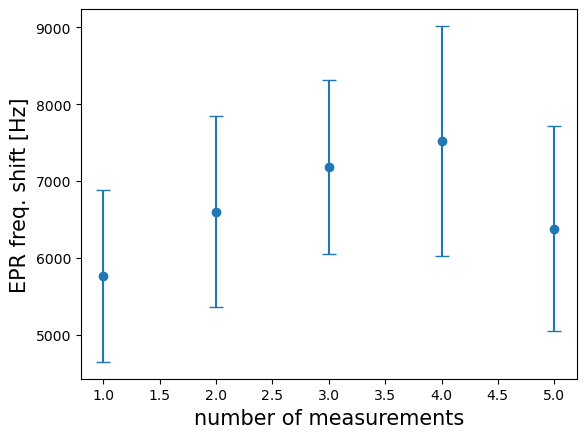

In [5]:
x = np.linspace(1, int(len(file_path)/2), 5)
plt.errorbar(x, EPRfreq_l, yerr=EPRfreq_dev_l, fmt="o", capsize=5)
plt.xlabel("number of measurements", fontsize=15)
plt.ylabel("EPR freq. shift [Hz]", fontsize=15)
plt.show()

In [14]:
mu_0 = 1.25663*10**(-6)          #[m kg s^-2 A^-2]
mu_B = 9.27401*10**(-24)         #[J T^-1] = [m^2 A]
mu_He = -1.07461*10**(-26)       #[J T^-1] = [m^2 A]
mu_N = 5.05078*10**(-27)
mu_Xe_131 = 0.687020*mu_N
mu_Xe_129 = -0.777960*mu_N
g_I = -0.000293640
g_e = -2.00231
#g_J = 2.002332
I = 5/2
A = 1.01191*10**9                #[s^-1]
He_num = 2.68678*3.3*10**25      #[m^-3]
#Xe_num = 2.7048*0.264*10**25           #[m^-3] 
Xe_num = 5.88*10**3*6.02*10**23/129 # 0℃のとき1気圧の129 enrichセル
B = 1.5*10**(-3)                 #[T]
kappa_Xe = 518
h = 6.62607*10**(-34)  #[J s]

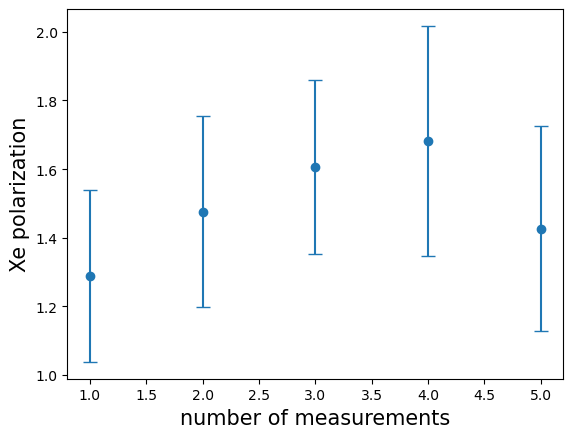

In [15]:
P_Xe_l = []
P_Xe_dev_l = []

for i in range(len(EPRfreq_l)):
    P_Xe = 100*EPRfreq_l[i]/(2*(2*mu_0/3)*(mu_B*g_e/(h*(2*I+1)))*(1-(8*I/(2*I+1)**2)*(mu_B*g_e*B/(h*A)))*kappa_Xe*mu_Xe_129*Xe_num)
    P_Xe_dev = 100*EPRfreq_dev_l[i]/(2*(2*mu_0/3)*(mu_B*g_e/(h*(2*I+1)))*(1-(8*I/(2*I+1)**2)*(mu_B*g_e*B/(h*A)))*kappa_Xe*mu_Xe_129*Xe_num)
    P_Xe_l.append(P_Xe)
    P_Xe_dev_l.append(P_Xe_dev)

x = np.linspace(1, int(len(file_path)/2), 5)
plt.errorbar(x, P_Xe_l, yerr=P_Xe_dev_l, fmt="o", capsize=5)
plt.xlabel("number of measurements", fontsize=15)
plt.ylabel("Xe polarization", fontsize=15)
plt.show()

In [13]:
P_Xe_mean = stat.mean(P_Xe_l)
P_Xe_stdev = stat.stdev(P_Xe_l)

print(P_Xe_mean)
print(P_Xe_stdev)

2.080106142433225
0.2142478600933443
